In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
df=pd.read_csv('../data/dataset project.csv')

In [3]:
df.head(4)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0


In [4]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
df.shape

(1781, 21)

In [6]:
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [7]:
df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

<AxesSubplot:>

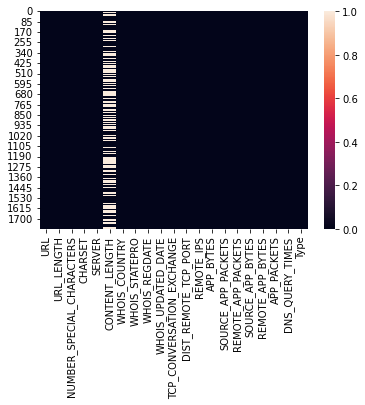

In [8]:
sns.heatmap(df.isnull())

In [9]:
 df.fillna({'CONTENT_LENGTH': 0}, inplace=True)

In [10]:
#mean_value = df['CONTENT_LENGTH'].mean()

In [11]:
df= df.fillna('method'== 'bfill',axis=1) # by mean

<AxesSubplot:>

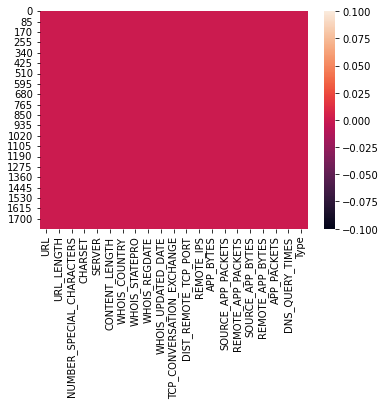

In [12]:
sns.heatmap(df.isnull())

In [13]:
for i in df.columns:
    print(i,df[i].nunique())

URL 1781
URL_LENGTH 142
NUMBER_SPECIAL_CHARACTERS 31
CHARSET 9
SERVER 240
CONTENT_LENGTH 637
WHOIS_COUNTRY 49
WHOIS_STATEPRO 182
WHOIS_REGDATE 891
WHOIS_UPDATED_DATE 594
TCP_CONVERSATION_EXCHANGE 103
DIST_REMOTE_TCP_PORT 66
REMOTE_IPS 18
APP_BYTES 825
SOURCE_APP_PACKETS 113
REMOTE_APP_PACKETS 116
SOURCE_APP_BYTES 885
REMOTE_APP_BYTES 822
APP_PACKETS 113
DNS_QUERY_TIMES 10
Type 2


In [14]:
df.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

C:\DBDA\desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrubution \n (0:safe domain || 1: Malicious domain)')

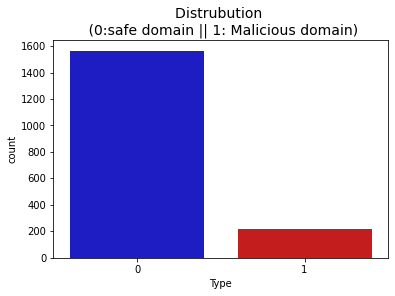

In [15]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Type', data=df, palette=colors)
plt.title('Distrubution \n (0:safe domain || 1: Malicious domain)', fontsize=14)

In [16]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [17]:
#df['URL']= le.fit_transform(df['URL'].astype(str))  #df[column] = le.fit_transform(df[column].astype(int)) #int

In [18]:
from sklearn.preprocessing import LabelEncoder


In [19]:
# le = LabelEncoder()
# for column in ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
#        'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
#        'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
#        'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
#        'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
#        'APP_PACKETS', 'DNS_QUERY_TIMES']:
#     df[column] = le.fit_transform(df[column].astype(str)) #int

In [20]:
#column

In [21]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [22]:
from sklearn.utils import shuffle

In [23]:
df = shuffle(df)

In [24]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1666,B0_1199,103,17,utf-8,Apache-Coyote/1.1,15666.0,US,OH,30/10/2002 0:00,15/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
208,B0_254,32,8,iso-8859-1,Apache,334.0,SI,--,19/02/2009 0:00,22/12/2015 0:00,...,1,4,816,10,13,1541,958,10,2.0,0
1253,B0_204,63,11,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,32,17,6011,73,42,28050,6453,73,6.0,0
1595,M4_65,94,19,utf-8,Microsoft-IIS/6.0,0.0,US,California,18/06/2003 0:00,14/06/2016 0:00,...,1,1,90,1,4,354,90,1,0.0,1
97,B0_1353,27,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/03/2017 0:00,23/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [25]:
# amount of fraud classes 394 rows
# fraud_df = train_df.loc[train_df['Class'] == 1]
# non_fraud_df = train_df.loc[train_df['Class'] == 0][:394]

In [26]:
df.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [27]:
malicious_domain = df.loc[df['Type'] == 1]

safe_domain = df.loc[df['Type'] == 0][:300]

In [28]:
malicious_domain

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1595,M4_65,94,19,utf-8,Microsoft-IIS/6.0,0.0,US,California,18/06/2003 0:00,14/06/2016 0:00,...,1,1,90,1,4,354,90,1,0.0,1
624,M0_132,43,13,UTF-8,nginx,646.0,None,None,None,None,...,1,4,1266,15,12,966,1554,15,4.0,1
584,M0_40,42,10,utf-8,nginx/1.10.1,0.0,None,None,7/04/2002 20:00,None,...,0,3,2124,17,20,12884,2270,17,2.0,1
1639,M4_23,100,20,UTF-8,Apache,0.0,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
780,M0_86,47,11,ISO-8859-1,Apache/2.2.31 (CentOS),0.0,PA,PANAMA,19/07/2004 0:00,6/07/2016 0:00,...,11,7,3213,34,32,16931,3821,34,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,M4_51,126,23,UTF-8,Apache,0.0,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1644,M4_4,100,20,UTF-8,Apache,0.0,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,1,66,1,3,190,66,1,0.0,1
824,M0_51,48,11,ISO-8859-1,Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL...,2516.0,US,Utah,24/05/2000 0:00,25/05/2016 0:00,...,0,2,4041,30,25,12420,4505,30,6.0,1
1730,M4_58,126,25,UTF-8,Apache,0.0,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1


In [29]:
malicious_domain.Type.count()

216

In [30]:
safe_domain

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1666,B0_1199,103,17,utf-8,Apache-Coyote/1.1,15666.0,US,OH,30/10/2002 0:00,15/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
208,B0_254,32,8,iso-8859-1,Apache,334.0,SI,--,19/02/2009 0:00,22/12/2015 0:00,...,1,4,816,10,13,1541,958,10,2.0,0
1253,B0_204,63,11,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,32,17,6011,73,42,28050,6453,73,6.0,0
97,B0_1353,27,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/03/2017 0:00,23/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
798,B0_220,47,12,UTF-8,mw2228.codfw.wmnet,0.0,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,20,8,4167,33,33,3181,4499,33,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,B0_534,76,15,ISO-8859-1,None,12368.0,US,CA,9/01/1998 0:00,4/01/2017 0:00,...,0,5,4544,55,57,53238,5134,55,8.0,0
334,B0_474,36,6,iso-8859-1,Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips,210.0,None,None,8/12/2007 0:00,28/03/2017 0:00,...,0,1,466,5,6,668,640,5,2.0,0
807,B0_32,47,11,UTF-8,Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips PHP/...,10804.0,None,None,18/10/2004 0:00,2/07/2015 0:00,...,2,4,296,6,9,778,442,6,2.0,0
1487,B0_129,80,12,UTF-8,GSE,38149.0,US,CA,31/07/2000 0:00,29/06/2016 0:00,...,0,5,3333,45,43,42229,3715,45,4.0,0


In [31]:
safe_domain.Type.count()

300

In [32]:
Normlize_dis = pd.concat([malicious_domain,safe_domain])

In [33]:
df2 = Normlize_dis.sample(frac=1, random_state=42)

In [34]:
df2.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1109,B0_250,57,10,ISO-8859-1,None,0.0,US,CA,29/03/1997 0:00,29/11/2016 0:00,...,58,6,8280,75,65,23559,9168,75,12.0,0
1242,B0_276,62,11,iso-8859-1,Apache/2.2.15 (CentOS),0.0,US,UT,16/05/1995 0:00,21/10/2016 0:00,...,5,4,1040,15,19,2206,1374,15,4.0,0
673,B0_2257,44,7,UTF-8,Apache,0.0,US,Arizona,12/03/2008 0:00,19/05/2016 0:00,...,7,12,1092,14,15,970,1092,14,0.0,0
626,M0_54,43,10,ISO-8859-1,Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL...,2516.0,US,Utah,24/05/2000 0:00,25/05/2016 0:00,...,0,2,3970,29,27,12548,4434,29,6.0,1
1140,B0_329,58,12,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CA,18/04/2001 0:00,27/09/2016 0:00,...,42,4,6256,58,63,63202,6896,58,8.0,0
274,M0_108,35,9,ISO-8859-1,Apache,7314.0,None,None,21/09/2009 0:00,9/08/2016 0:00,...,0,2,3240,45,45,35301,3722,45,6.0,1
1752,M4_32,143,26,UTF-8,Apache,0.0,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1450,B0_534,76,15,ISO-8859-1,None,12368.0,US,CA,9/01/1998 0:00,4/01/2017 0:00,...,0,5,4544,55,57,53238,5134,55,8.0,0
723,B0_683,45,10,utf-8,None,14947.0,US,NY,25/07/1998 0:00,5/03/2017 0:00,...,0,3,1816,23,22,12138,2104,23,4.0,0
160,B0_2282,30,6,UTF-8,Apache,14703.0,US,Texas,4/08/1998 0:00,4/09/2013 0:00,...,2,1,276,2,4,250,276,2,0.0,0


C:\DBDA\desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrubution \n (0:safe domain || 1: Malicious domain)')

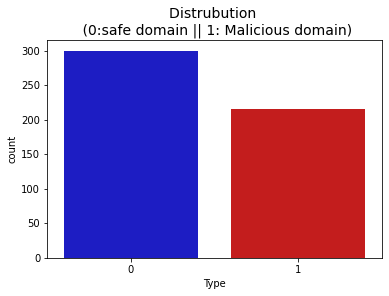

In [35]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Type', data=df2, palette=colors)
plt.title('Distrubution \n (0:safe domain || 1: Malicious domain)', fontsize=14)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from utils import predict_and_evaluate
from sklearn.model_selection import cross_val_score,KFold

In [37]:
# Separate target variable
X = df2.drop(['Type'], axis=1)
y = df2['Type']

In [38]:
df2["Type"].dtype

dtype('O')

In [39]:
y = df2['Type'].astype('O').astype(int)

In [40]:
y.dtype

dtype('int32')

In [ ]:
# One-hot encode the training data and show the resulting 
# DataFrame with proper column names

# ohe = OneHotEncoder() # Create onehot encoder object
# ohe.fit(X_train) # Fit it with train data
# X_train_ohe = ohe.transform(X_train).toarray() # Perform one-hot encoding

In [ ]:
# ohe_df = pd.DataFrame(X_train_ohe, 
#                      columns=ohe.get_feature_names(X_train.columns))

# ohe_df.head() 

In [59]:
ohe = OneHotEncoder()

ohe.fit(X)

X_ohe = ohe.transform(X).toarray()

In [63]:
ohe_df = pd.DataFrame(X_ohe,
                     columns=ohe.get_feature_names(X.columns))

C:\DBDA\desktop\Python\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
ohe_df.head()

,URL_B0_1006,URL_B0_1007,URL_B0_1025,URL_B0_1028,URL_B0_1031,URL_B0_1042,URL_B0_1058,URL_B0_1074,URL_B0_1080,URL_B0_109,...,APP_PACKETS_228,DNS_QUERY_TIMES_0.0,DNS_QUERY_TIMES_2.0,DNS_QUERY_TIMES_4.0,DNS_QUERY_TIMES_6.0,DNS_QUERY_TIMES_8.0,DNS_QUERY_TIMES_10.0,DNS_QUERY_TIMES_12.0,DNS_QUERY_TIMES_14.0,DNS_QUERY_TIMES_20.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
X = ohe_df

In [66]:
# Split the data into train and test samples
# 80% samples for test and 20% for test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
rf_pred = rf.predict(X_test)

In [70]:
rf_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [71]:
# Accuracy score
print('Accuracy score: ',accuracy_score(y_test, rf_pred)*100)

Accuracy score:  89.42307692307693


In [72]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print('Confusion matrix\n',cm)

Confusion matrix
 [[51  3]
 [ 8 42]]


In [74]:
# Classification report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.93      0.84      0.88        50

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



In [75]:
# AUC 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rf_pred)

0.8922222222222221

# Cross Validation
## Using k fold

In [76]:
Kfold_val = KFold(5)

In [77]:
Kfold_val = KFold(5)
score_rf = cross_val_score(rf, X, y, cv= Kfold_val, scoring='accuracy')
print(score_rf)
np.mean(score_rf)

[0.88461538 0.87378641 0.94174757 0.91262136 0.91262136]


0.9050784167289022

In [78]:
# Feature importance of Random forest
rf.feature_importances_

array([0.00000000e+00, 5.21718654e-05, 7.01489815e-05, ...,
       4.39250255e-06, 0.00000000e+00, 9.51725911e-05])

In [79]:
# Get Feature importance of Random forest
fi = pd.Series(rf.feature_importances_, index=X_train.columns)

In [100]:
# Sorting the result in descending order for Random forest
#feature_importances.sort_values(ascending=False, inplace=True)
fi.sort_values(ascending=False, inplace=True)

In [101]:
fi

REMOTE_APP_PACKETS_0                  0.036371
WHOIS_UPDATED_DATE_2/09/2016 0:00     0.029026
WHOIS_COUNTRY_US                      0.028184
WHOIS_COUNTRY_ES                      0.028096
SOURCE_APP_BYTES_0                    0.025787
                                        ...   
WHOIS_REGDATE_4/11/2004 22:27         0.000000
WHOIS_REGDATE_4/08/1998 0:00          0.000000
WHOIS_REGDATE_4/08/1995 0:00          0.000000
WHOIS_REGDATE_4/03/2006 0:00          0.000000
WHOIS_UPDATED_DATE_16/04/2016 0:00    0.000000
Length: 2773, dtype: float64

In [105]:
# # Plot the graph of feature importances showing the score
# fig = plt.figure(figsize=(8,6), dpi=100)
# fi.plot.bar()
# plt.title('Feature importances')
# plt.xlabel('Features')
# plt.ylabel('Mean decrease in impurity')
# plt.show()

# 2. Gradient Boosting Model

In [83]:
gbm = GradientBoostingClassifier()

In [84]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

# 2.2 Evaluating the model

In [85]:
# Predict the Test set results
gbm_pred = gbm.predict(X_test)
gbm_pred[:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [86]:
print('Accuracy : \n', accuracy_score(y_test, gbm_pred)*100)

Accuracy : 
 89.42307692307693


In [87]:
# Precision (P)
print( "Precision: \n", precision_score(y_test,gbm_pred))

Precision: 
 0.8979591836734694


In [88]:
# Classification report
print(classification_report(y_test,gbm_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.90      0.88      0.89        50

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



# 3. Xtreme Gradient Boosting

In [89]:
from xgboost import XGBClassifier

# 3.1 Model Training

In [90]:
xgb = XGBClassifier()

In [91]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [92]:
# Predict the Test set results
xgb_pred = xgb.predict(X_test)
xgb_pred[:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [93]:
print('Accuracy : \n', accuracy_score(y_test, xgb_pred)*100)

Accuracy : 
 91.34615384615384


In [94]:
# Classification report
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.92      0.90      0.91        50

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



# Hyperparameter Optimization

In [95]:
# Set the parameter matrix for Random forest
random_grid = {'n_estimators': [10],
              'max_features': ['auto'],
              'max_depth': range(10,20,2),
              'min_samples_leaf':[2],
              'bootstrap': ['True']}
grid_rnf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_grid, n_jobs = 16, cv= 5)

In [96]:
%time
grid_rnf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


C:\DBDA\desktop\Python\python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'bootstrap': ['True'], 'max_depth': range(10, 20, 2),
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'n_estimators': [10]})

In [97]:
grid_rnf.best_params_

{'bootstrap': 'True',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 10}

In [98]:
rnd_first = grid_rnf.best_estimator_

In [99]:
rnd_first_hpo = predict_and_evaluate(rnd_first, X_test, y_test)

Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score
RandomForestClassifier,5,7,0.9,0.86,0.88
